In [1]:
# Import the modules
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
% matplotlib inline

In [2]:
filename = 'Folds5x2_pp.xlsx' # The file can be downloded from UCI ML repo
df = pd.read_excel(filename, sheet_name='Sheet1')
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [3]:
X, Y = df[['AT', 'V','AP','RH']], df['PE']
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
target_scaler = MinMaxScaler()
Y_new = target_scaler.fit_transform(Y.values.reshape(-1,1))
X_train, X_test, Y_train, y_test = \
  train_test_split(X_new, Y_new, test_size=0.4, random_state=333)

In [4]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, Y_train)


DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [5]:
Y_pred = model.predict(np.float32(X_test))

In [6]:
print("R2 Score is {} and MSE {}".format(\
       r2_score(y_test, Y_pred),\
       mean_squared_error(y_test, Y_pred)))

R2 Score is 0.9077326633644909 and MSE 0.004748858361843866


Text(0,0.5,'Predicted Net Hourly Electrical Energy Output (MW)')

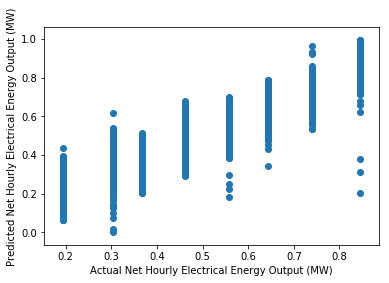

In [7]:
plt.scatter(Y_pred, y_test)
#plt.plot(X_test, Y_pred)
plt.xlabel("Actual Net Hourly Electrical Energy Output (MW)")
plt.ylabel("Predicted Net Hourly Electrical Energy Output (MW)")